In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from math import log

2022-07-23 18:47:58.290851: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-23 18:47:58.290983: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.25.8) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
filePath = 'dadosTrabalhoRNA.xlsx'

df = pd.read_excel(filePath)
df = df.dropna(axis=1)

x = np.array(df['Entrada'], dtype=int)
y = np.array(df['Saída'], dtype=int)


# train_labels, train_samples = shuffle(train_labels, train_samples)
#train_samples = [log(x) for x in df['Entrada'][1:]]
#train_samples = np.array(train_samples)
# train_labels = log(train_labels)


In [3]:
normalized_x = x/max(x)
normalized_y = y/max(y)
# print(scaled_x)
shuffled_x, shuffled_y = shuffle(normalized_x, normalized_y)
# print(train_samples)
# print(scaled_train_samples)
# X_train, X_test, y_train, y_test = train_test_split(scaled_x, scaled_y, shuffle=True, train_size = .8)
# scaled_train_labels, scaled_train_samples = shuffle(scaled_train_labels, scaled_train_samples)

In [47]:
model = Sequential([
         Dense(units=144, input_shape=(1,), activation='tanh'),
         Dense(units=72, activation='relu'),
         Dense(units=72, activation='relu'),
         Dense(units=72, activation='relu'),
         Dense(units=144, activation='relu'),
         # Dense(units=5, activation='relu'),
         # Dense(units=60, activation='relu'),
         # Dense(units=48, activation='relu'),
         # Dense(units=60, activation='relu'),
         # Dense(units=60, activation='linear'),
         # Dense(units=48, activation='linear'),
         Dense(units=1),
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mse'])
model.fit(
   x=scaled_x, 
   y=scaled_y, 
   batch_size=10, 
   epochs=2000,
   validation_split=0.2
)


Epoch 1/2000
5/5 [==============================] - 1s 38ms/step - loss: 0.4560 - mse: 0.4560 - val_loss: 0.2909 - val_mse: 0.2909
Epoch 2/2000
5/5 [==============================] - 0s 9ms/step - loss: 0.4365 - mse: 0.4365 - val_loss: 0.2692 - val_mse: 0.2692
Epoch 3/2000
5/5 [==============================] - 0s 9ms/step - loss: 0.4195 - mse: 0.4195 - val_loss: 0.2487 - val_mse: 0.2487
Epoch 4/2000
5/5 [==============================] - 0s 10ms/step - loss: 0.4013 - mse: 0.4013 - val_loss: 0.2276 - val_mse: 0.2276
Epoch 5/2000
5/5 [==============================] - 0s 10ms/step - loss: 0.3830 - mse: 0.3830 - val_loss: 0.2060 - val_mse: 0.2060
Epoch 6/2000
5/5 [==============================] - 0s 10ms/step - loss: 0.3646 - mse: 0.3646 - val_loss: 0.1848 - val_mse: 0.1848
Epoch 7/2000
5/5 [==============================] - 0s 9ms/step - loss: 0.3455 - mse: 0.3455 - val_loss: 0.1655 - val_mse: 0.1655
Epoch 8/2000
5/5 [==============================] - 0s 9ms/step - loss: 0.3267 - mse: 

2/2 [==============================] - 0s 2ms/step


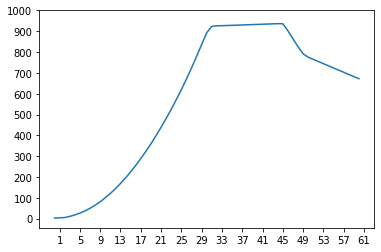

In [49]:
data = [i/60 for i in range(61)]
# print(scaled_x)
# print(data)
prediction = model.predict(data)
# print(scaler.inverse_transform(prediction))
plt.plot(scaler.inverse_transform(prediction))
plt.yticks([y for y in range(0, 1001, 100)])
plt.xticks([x for x in range(1, 62, 4)])

plt.show()